
# Object Detection (Tell me what to find)

# Introduction

Given a text and an image we need to detect the object by the text description in the image. There are 70
categories of objects. To make things modular, we can solve the problem in two steps.
Object detection: In this step, we will find important object in the image.
Object matching with description: From the given natural language description of the object we will extract
the object to find and search them in the extracted set of detected object.

The code can be found in the file Coding.ipynb

The code for resize images can be foung in file as this code will convert the aspect size of 416*416 resizeImage.py


# Identifying problem

The problem we are trying to solve is identifying the correct image according to the text description. We will have number of images and and we will be given single object description. According to the specified text description we need to correctly identify the image whose class matches with the class of text descriptiom.
In this project, We are given images from certain frames in videos. Images are pre-labeled with bounding boxes of objects like human and animals. The project is divided into 2 parts - For the first part, we need to annotate the image. We need to crowdsource a natural language description of the object, which is given in the form of a bounding box. For the second part, after discussing with the mentor we decided to identify the correct image according to the natural language annotation with the correct bounding box from the given set of images.


# Background Investigation

We needed to train the images so that we can generate the bounded boxes according to the class.We needed the object detection model that can learn the features of the image and can classify the test image correctly with bounded boxes. There are several object detectors to choose from like Faster R-CNN, SSD and YOLOv3. We compared the different object detector models to choose the appropriate model for our project.

CNN( Convolutional Nueral Network) - It is a multilayer perceptron that requires minimal preprocessing. It use the principal of convolute(dot product), max pooling, scaling, padding. We can extract features in images like edges, corners etc. It was not the ideal one as we had dataset consist of 160000 images and for such huge dataset the speed of computation using CNN will be an issue.

RCNN - It is similar to the CNN but instead of working on large number of regions, RCNN uses selective search to extract selected boxes from an image (these boxes are called regions).It cannot be implemented real time as it takes around 47 seconds for each test image. The selective search algorithm is a fixed algorithm. Therefore, no learning is happening at that stage. This could lead to the generation of bad candidate region proposals.

Fast-RCNN - It is based on the same principal of RCNN. Instead of feeding the region proposals to the CNN, it feeds the input image to the CNN to generate a convolutional feature mapReducing the computation time a R-CNN algorithm by running the CNN just once per image.When you look at the performance of Fast R-CNN during testing time, including region proposals slows down the algorithm significantly when compared to not using region proposals. Therefore, region proposals become bottlenecks in Fast R-CNN algorithm affecting its performance.

YOLO -  In YOLO a single convolutional network predicts the bounding boxes and the class probabilities for these boxes. It scans the entire image in a single instance and predicts the bounding box coordinates and class probabilities for these boxes. YOLO is orders of magnitude faster(45 frames per second) than other object detection algorithms.

Hence we decided to use YOLO v3 as our object detection model.

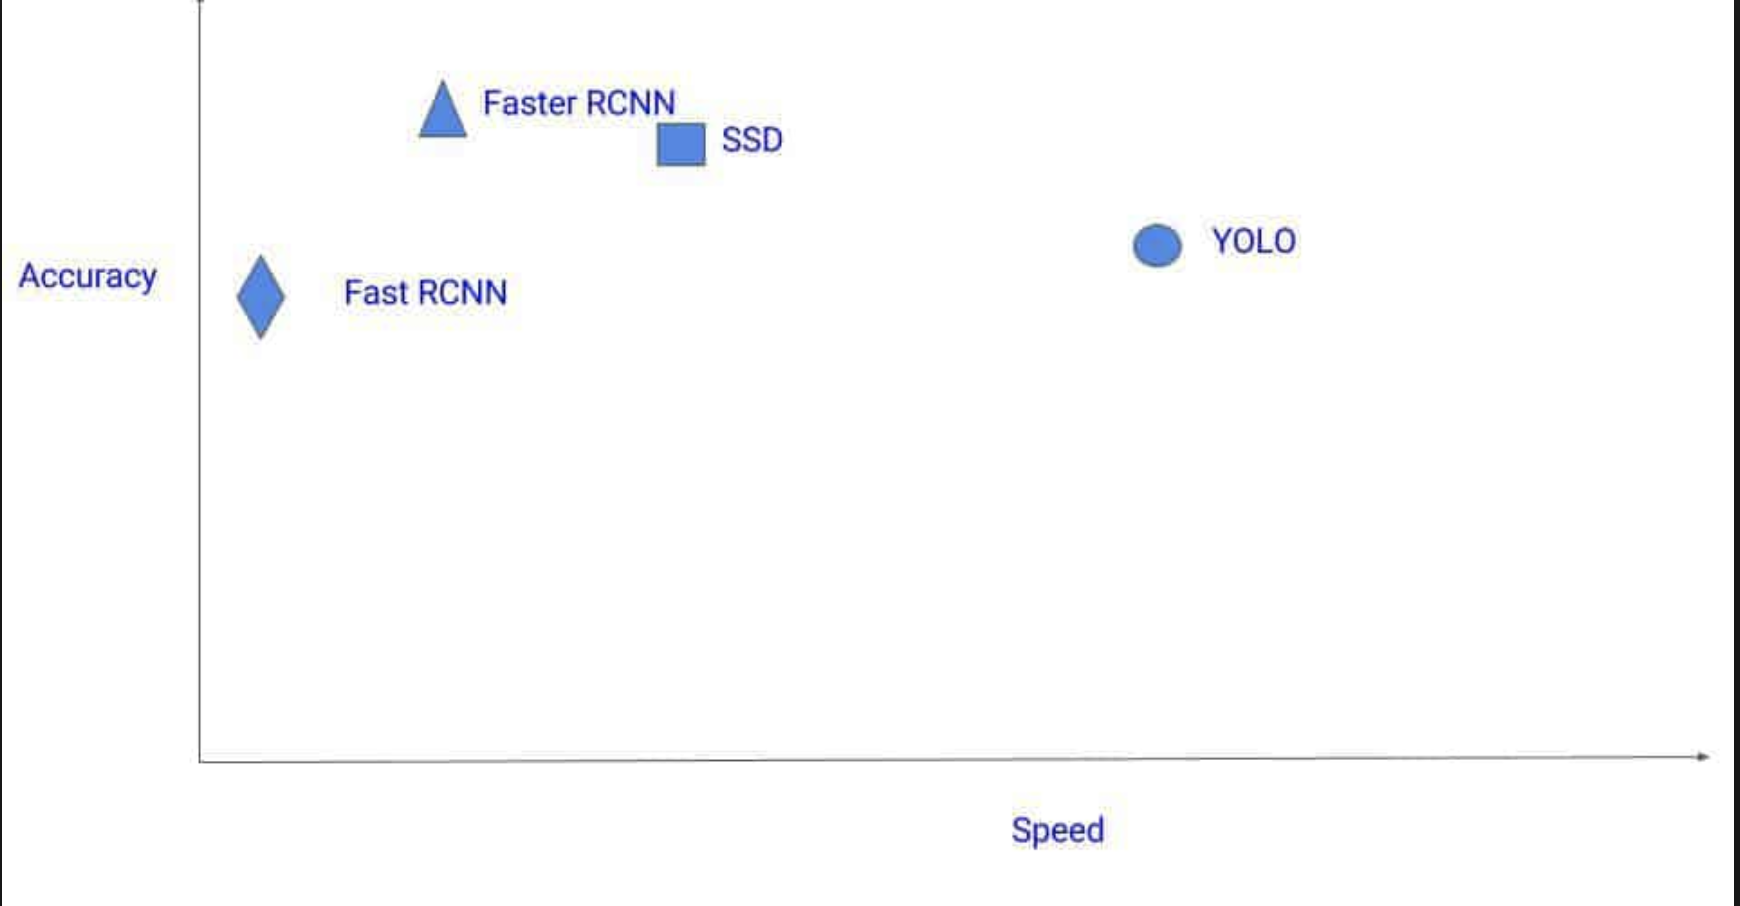



Text Classification Model  - There are different models present for the text classification such as RNN, CNN, LSTM.

RNN - A recurrent neural network (RNN) is an artificial neural network where nodes form a directed graph along a sequence. This allows it to exhibit dynamic temporal behavior for a time sequence.
Through external embedding can enhance the precision of your RNN because it integrates new information (lexical and semantic) about the words, an information that has been trained and distilled on a very large corpus of data.

LSTM - LSTMs are explicitly designed to avoid the long-term dependency problem.LSTMs also have this chain like structure, but the repeating module has a different structure. Instead of having a single neural network layer, there are four, interacting in a very special way.

CNN - CNN is a class of deep, feed-forward artificial neural networks where connections between nodes do not form a cycle & use a variation of multilayer perceptrons designed to require minimal preprocessing. These are inspired by animal visual cortex.

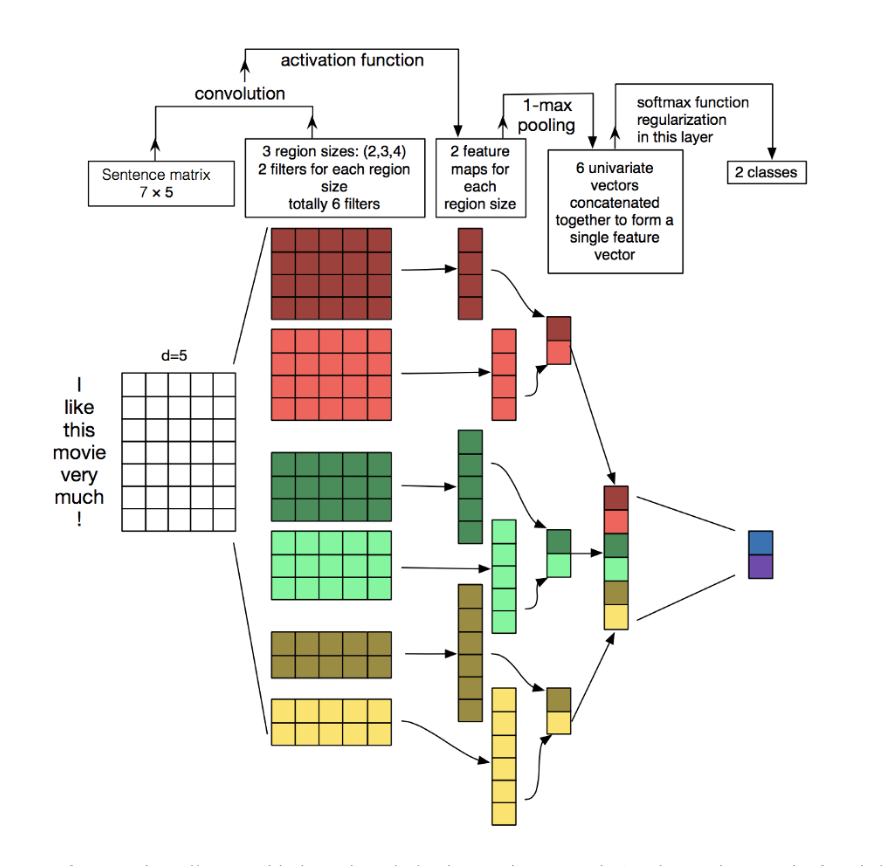

Limitations of RNN and LSTM

A typical recurrent neural network (RNN) has a state 𝑠𝑡 that is propagated to the next time step for computing the next state 𝑠𝑡+1. During training the error signal has to travel back in time, it has to propagate back to the previous states, an algorithm called backpropagation through time (BPTT) is thus used for training RNNs. So for arbitrarily long time steps, there is a chance of the signal becoming weak or exploding as it propagates backwards.
That happens because at each backward time step, the error signal gets weighted, if the weighting is greater than unity, exploding gradients are expected and if the weighting is less than unity, vanishing gradients are expected. This essentially makes the vanilla RNN incapable of handling long-term dependences.
RNN and LSTM are difficult to train because they require memory-bandwidth-bound computation, which is the worst nightmare for hardware designer and ultimately limits the applicability of neural networks solutions. In short, LSTM require 4 linear layer (MLP layer) per cell to run at and for each sequence time-step. Linear layers require large amounts of memory bandwidth to be computed, in fact they cannot use many compute unit often because the system has not enough memory bandwidth to feed the computational units. And it is easy to add more computational units, but hard to add more memory bandwidth (note enough lines on a chip, long wires from processors to memory, etc). As a result, RNN/LSTM and variants are not a good match for hardware acceleration, and we talked about this issue before here and here.

Advantages of using CNN

CNNs are considered good at extracting local and position-invariantfeatures and therefore should perform well on Text Classification. The convolutional neural network (CNN) as applied to natural language processing (NLP) using a vector embedding to concatenate incoming inputs into one long input vector can handle the long term dependences better than the vanilla RNN. The idea then is to convolve different sized filter kernels over the long input vector. That way the CNN can encode short-term and long-term dependences just by small and large kernel sizes respectively. The CNN used in this manner doesn't suffer from the vanishing/exploding gradient problem of the vanilla RNN.



# Reproduce the baseline


# PART 1

# Object detection

We searched for the existing algorithms and found Faster R-CNN, YOLOv3 (You Only Look Once) and SSD
(Single Shot MultiBox Detector). After comparing the accuracy and the frames per second of these
algorithms, we selected YOLO to move forward with object detection.
YOLO is a fully convolutional network and its eventual output is generated by applying a 1 x 1 kernel on a
feature map. In YOLO v3, the detection is done by applying 1 x 1 detection kernels on feature maps of three
different sizes at three different places in the network. YOLO v3 makes prediction at three scales, which are
precisely given by downsampling the dimensions of the input image by 32, 16 and 8 respectively. The most
salient feature of v3 is that it makes detections at three different scales.


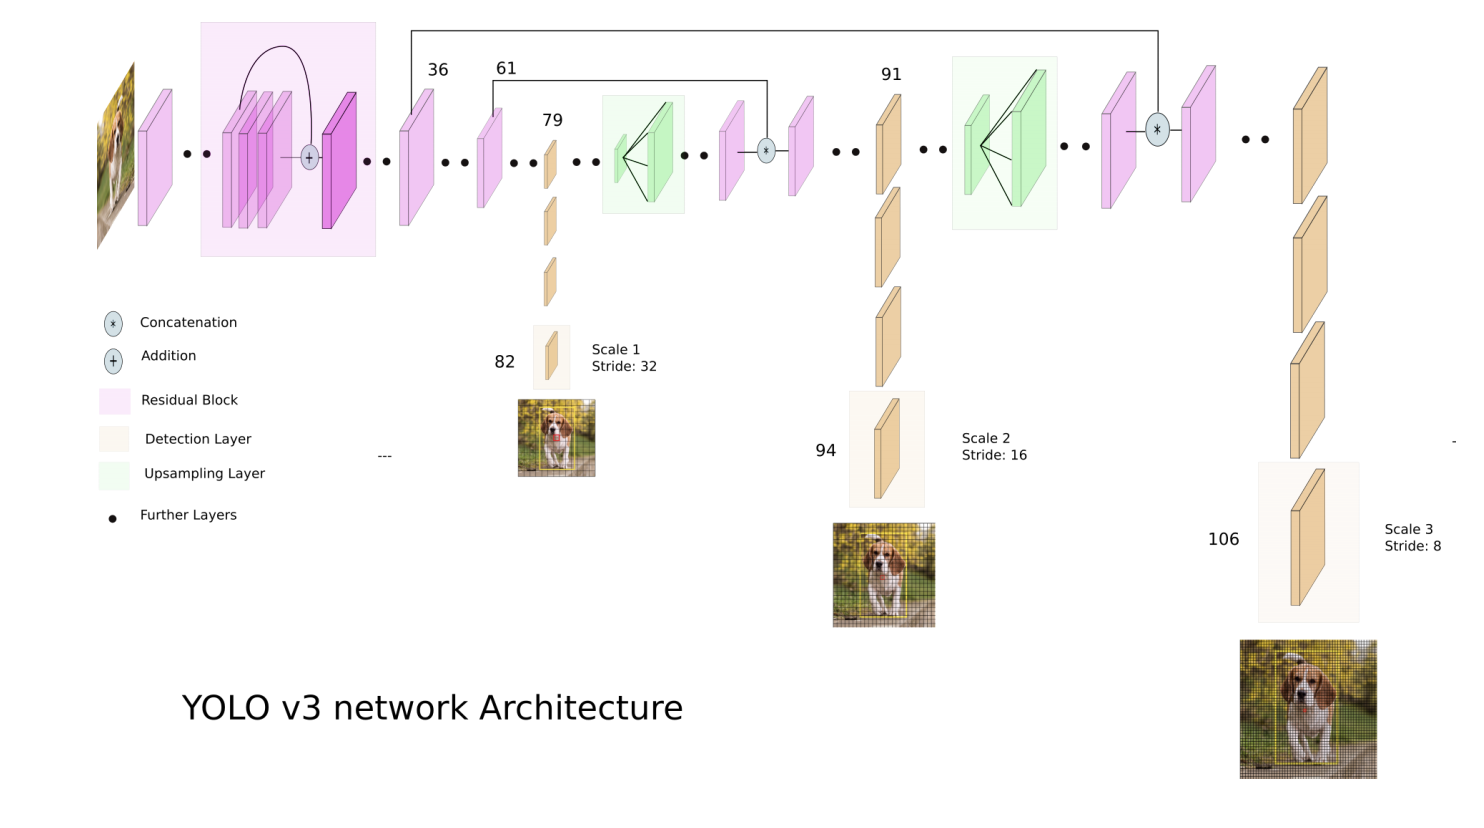


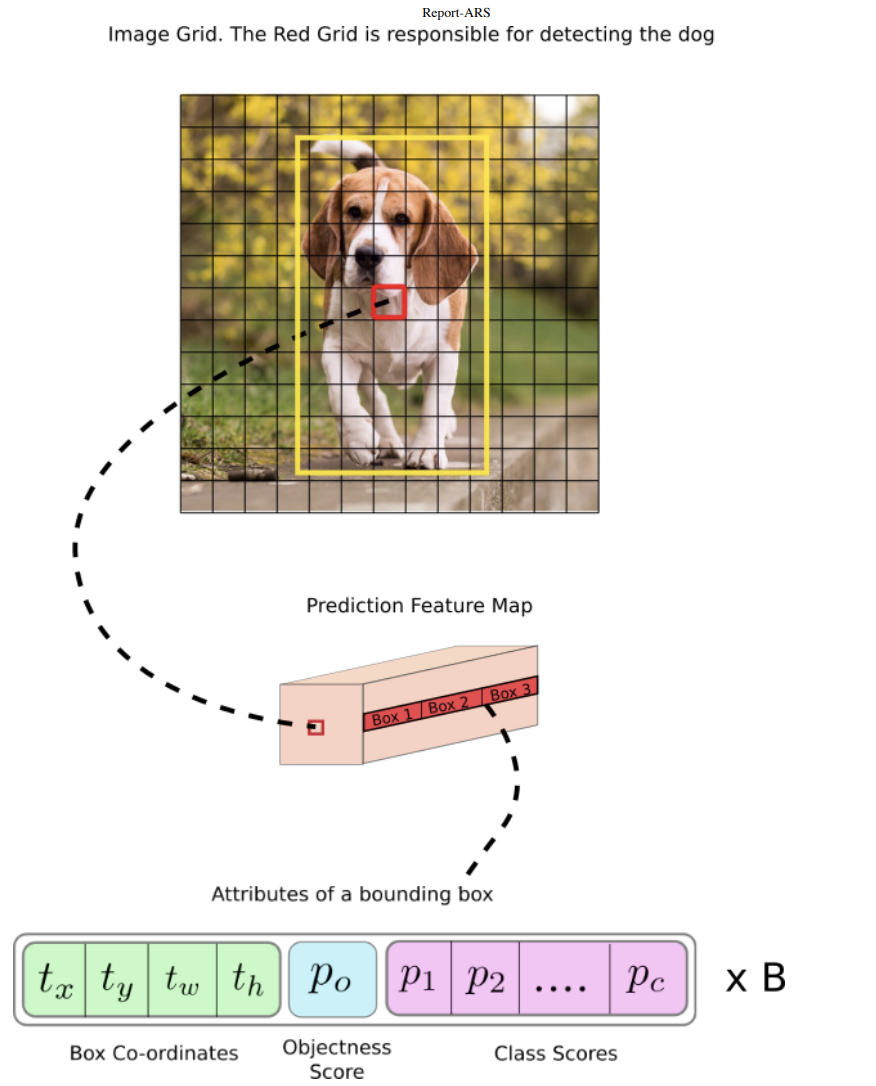

# Data preparation:
The darknet framework requires VOC model format. Thus, the given data from LASOT has to be converted.
We created different folders for the images and the corresponding labels. The label file contains information
about bounding boxes in the image and contains the information of object-class-id, center-x, center-y,
width, height. Whereas, the dataset provided by LASOT, contains the information of left, top, width and
height. Therefore, we transformed the data into the required format by adding required offsets while
maintaining the aspect ratio. Moreover, we normalized the co-ordinates.

# Parameter Selection:
The YOLOv3 contains 106 hidden layers, 3 output layes and a constant 0.001 learning rate after an initial
period of burn-in of 400 epochs. We trained our model for 2000 epochs.
The number of desired channels are calcualted as Filters = (numClasses/3) *(5 + classes)
In YOLOv3 anchors (width, height) - are sizes of objects on the image that resized to the network size
(width= and height= in the cfg-file). After doing some clustering studies on ground truth labels, it turns out
that most bounding boxes have certain height-width ratios. So instead of directly predicting a bounding box,
YOLOv3 predict off-sets from a predetermined set of boxes with particular height-width ratios - those
predetermined set of boxes are the anchor boxes.
# Object Selection:
By default, the YOLOv3 architecture outputs multi-labels so we selected the box with highest confidence for
predicting output for only 1 box. This technique works when there is only one object of interest, but it would
fail in multiclass setting.
Framework Testing:
We used MAP score for calculating the errors. The comparison includes bounding boxes and matches the
category of the object. The output from the baseline model can be seen below.

One of the main areas to look into was the platform, we had to do was the environment setup to run this is,
we decided to go with the google clous platform and choose a fast Nvidia GPU processor to train and test
our nerual nets. We have used the darknet application, built the application to take advantage of Nvidia
CUDA architecture and opencv architecture as well.
I will not go into complete details of the installation of these applications, we downloaded the source code
and built the whole application using cmake and make built tools.



# PART 2

# Text Classification 

Neural networks have contributed to outstanding advancements in fields such as computer vision and speech recognition. Lately, they have also started to be integrated in other challenging domains like Natural Language Processing (NLP). We are predicting the labels of image description using neural networks and word embeddings in NLP.

# Word Embedding 

Word embeddings are family of NLP techniques aiming at mapping semantic meaning into a geometric space. This is done by associating a numeric vector to every word in a dictionary, such that the distance between any two vectors would capture part of the semantic relationship between the two associated words. Word embeddings are (roughly) dense vector representations of wordforms in which similar words are expected to be close in the vector space.

 We will be using GloVe "Global Vectors for Word Representation" embeddings. It is an unsupervised learning algorithm for obtaining vector representations for words.It's popular embedding technique based on factorizing a matrix of word co-occurence statistics. We are using the pre-trained glove embeddings to convert a word into a 100 dimensional word embedding vector. These vectors are stacked and padded to created a (100,16,m) tensor which is passed through the input layer of CNN.
We modelled a 3 layer CNN for Text Classification with pretrained GloVe embeddings.



 
 
 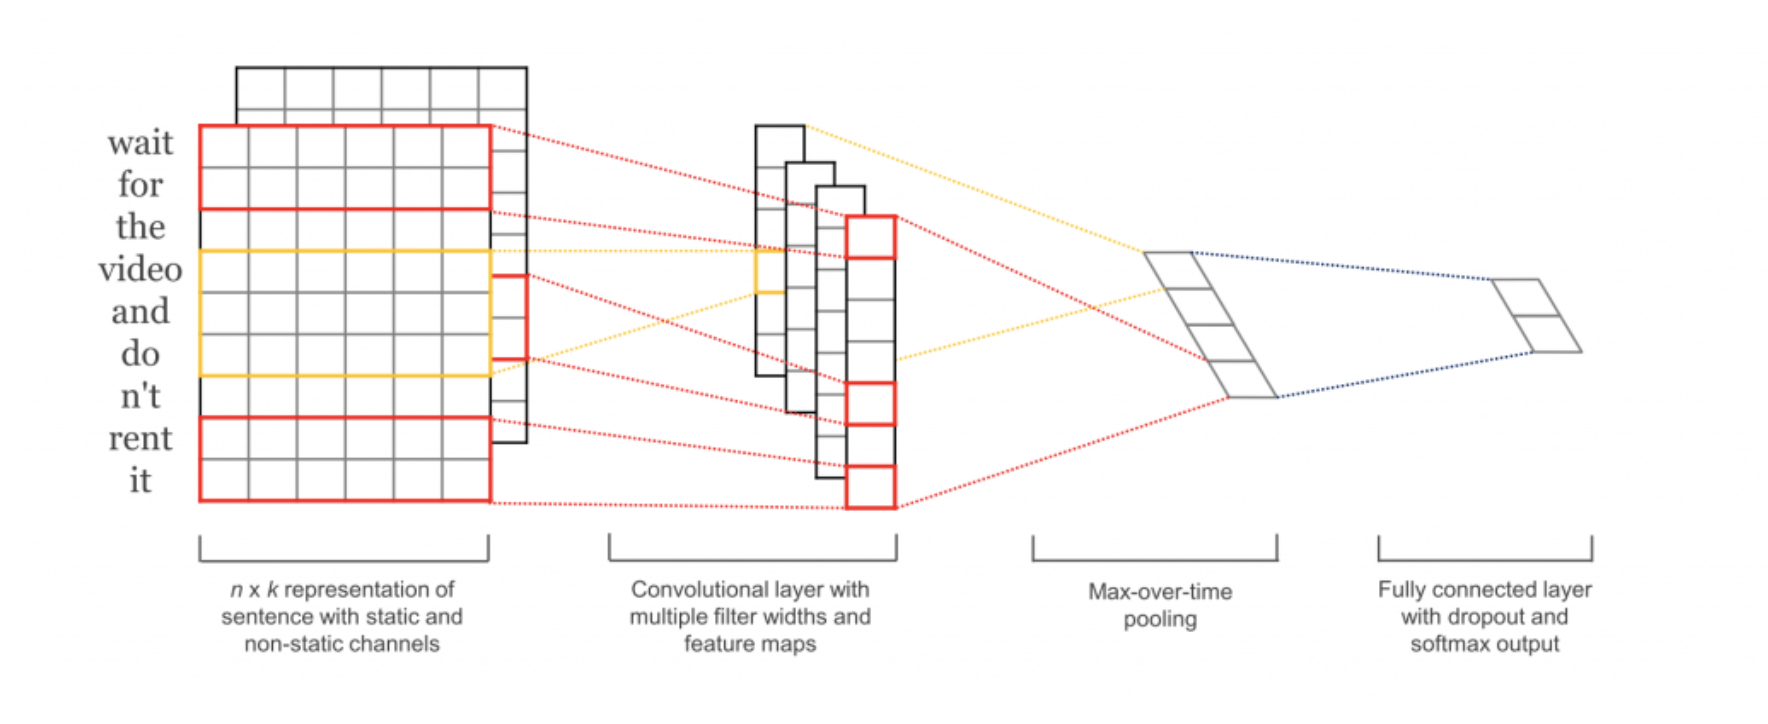
 

# Preparing the data

We iterate over the files in which our text samples are stored, and format them into a list of samples. We prepare a list of class indices matching the samples. Then we can format our text samples and labels into tensors that can be fed into a neural network. To do this, we will rely on Keras utilities keras.preprocessing.text.Tokenizer and keras.preprocessing.sequence.pad_sequences.

 # Approach
 
 Convert all text samples in the dataset into sequences of word indices. A "word index" would simply be an integer ID for the word. We will only consider the top 20,000 most commonly occuring words in the dataset, and we will truncate the sequences to a maximum length of 1000 words.Prepare an "embedding matrix" which will contain at index i the embedding vector for the word of index i in our word index. Load this embedding matrix into a Keras Embedding layer, set to be frozen. Build on top of it a 1D convolutional neural network, ending in a softmax output over our 70 categories.
 
# Embedding Layer

We create a embedding layer from word embeddings. Embedding layer is fed sequences of integers, i.e. a 2D input of shape. These input sequences should be padded so that they all have the same length in a batch of input data. We pad the ebmedding layer to have a homogeneous input throughout all the text.
The main functionality of Embedding layer is to map the integer inputs to the vectors found at the corresponding index in the embedding matrix. The output of the Embedding layer is be a 3D tensor of shape (samples, sequence_length, embedding_dim).





# MATCHING THROUGH PART 1 AND PART 2


 
# Finding image using the text description


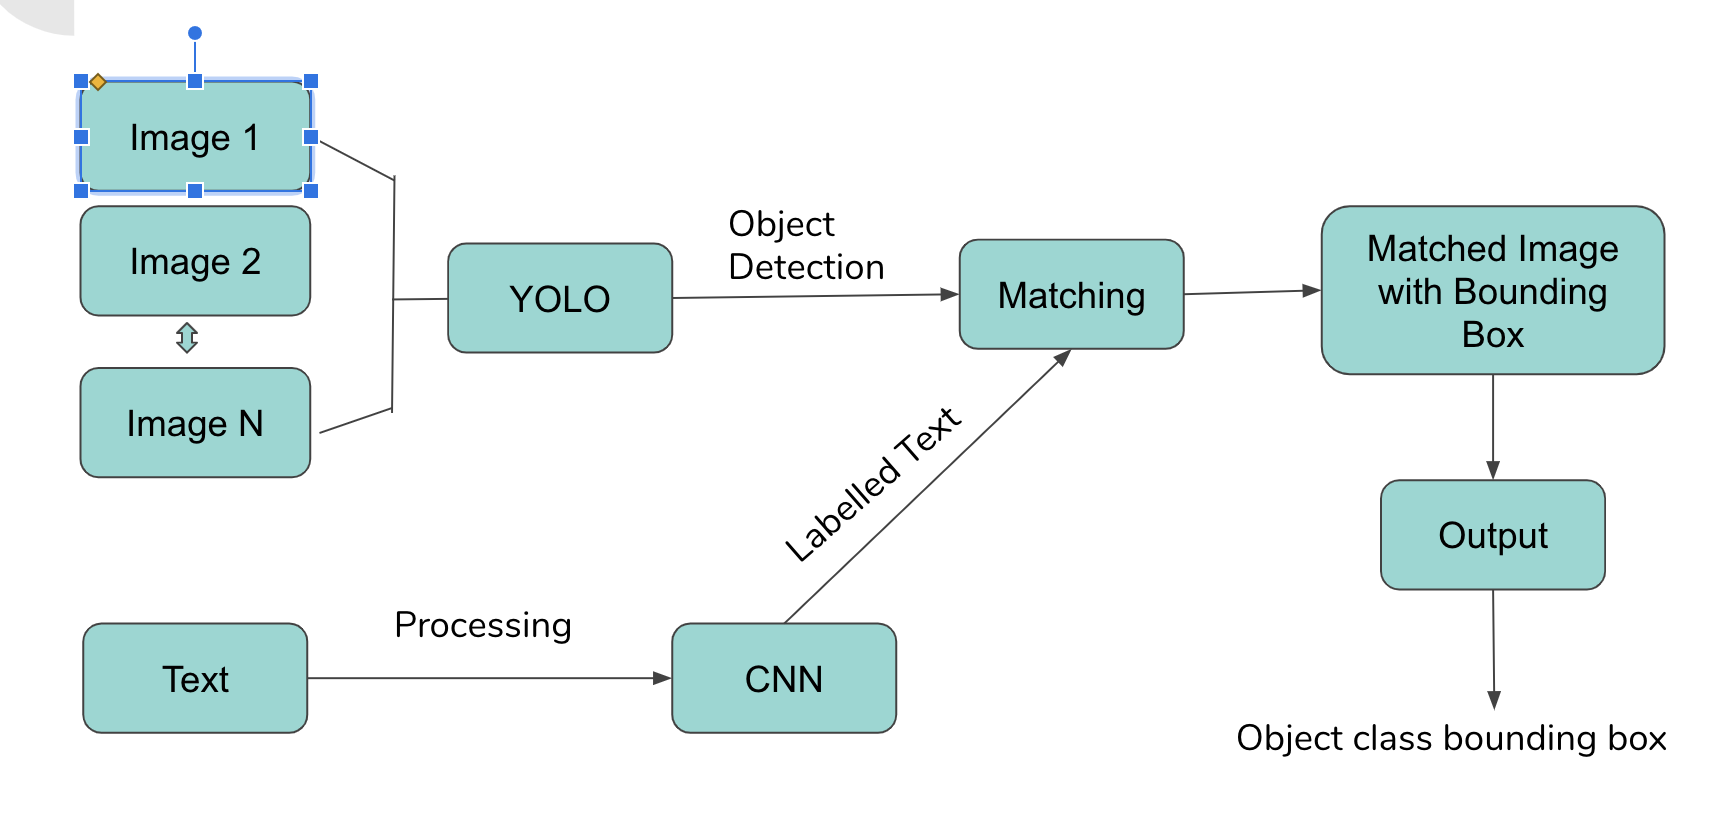

Our goal is to find the correct image which has bounded object according the text description. We passed the images to the object detection model i.e. Yolov3. As the output of YOLOv3, We have the multiple images labelled with the bounding boxes and their confidence interval. Now, we use the Convolutional Neural Network for text classification using the Keras model. We get the labelled text description according to the class as the output. Then we use a matching algorithm to identify correct image among the images for the text description according the label class.
As the output we will have the correct image according to its text description.


 
 





# Improvement

Image Resizing maintaining aspect ratio for improving learning rate - 

Current yolo implementation takes around 1 day to run ~1k epochs. This is very slow for our purpose because even after 1000 epochs, we do not get bounding boxes as the data set available is huge but context information is limited 
YOLO doesn’t require us to convert the image aspect ratio and automatically resizes it 
We created a method for resizing the image according to input layer of YOLO ( ie 416*416) by putting black labels on images while resizing them and maintaining their aspect ratio
This led to increase in epoch rate from ~1k to ~3.6k epochs in a day. We trained our model with decreasing epoch rate over 9k epochs 

Original Image - 


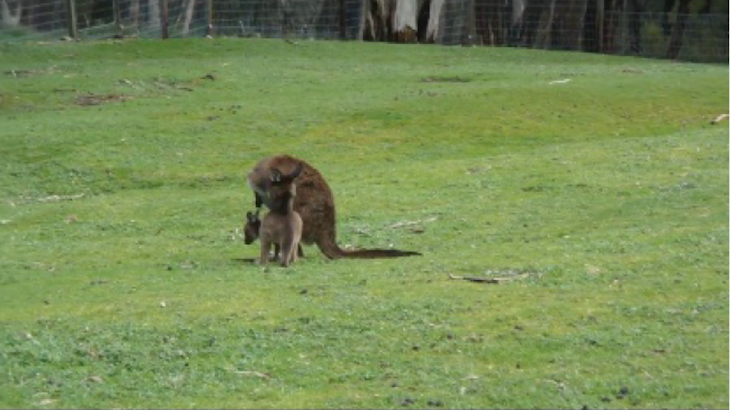


Resized Image - 

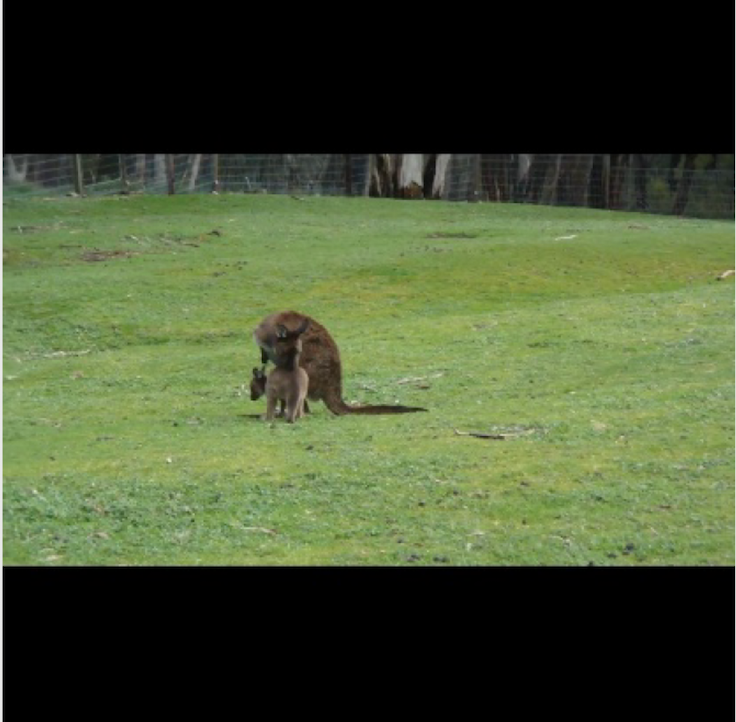

Cosine similarity -
Cosine similarity is the cosine of the angle between two n-dimensional vectors in an n-dimensional space. It is the dot product of the two vectors divided by the product of the two vectors' lengths (or magnitudes). When plotted on a multi-dimensional space, where each dimension corresponds to a word in the document, the cosine similarity captures the orientation (the angle) of the documents and not the magnitude. If you want the magnitude, compute the Euclidean distance instead.The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance because of the size (like, the word ‘cricket’ appeared 50 times in one document and 10 times in another) they could still have a smaller angle between them. Smaller the angle, higher the similarity.


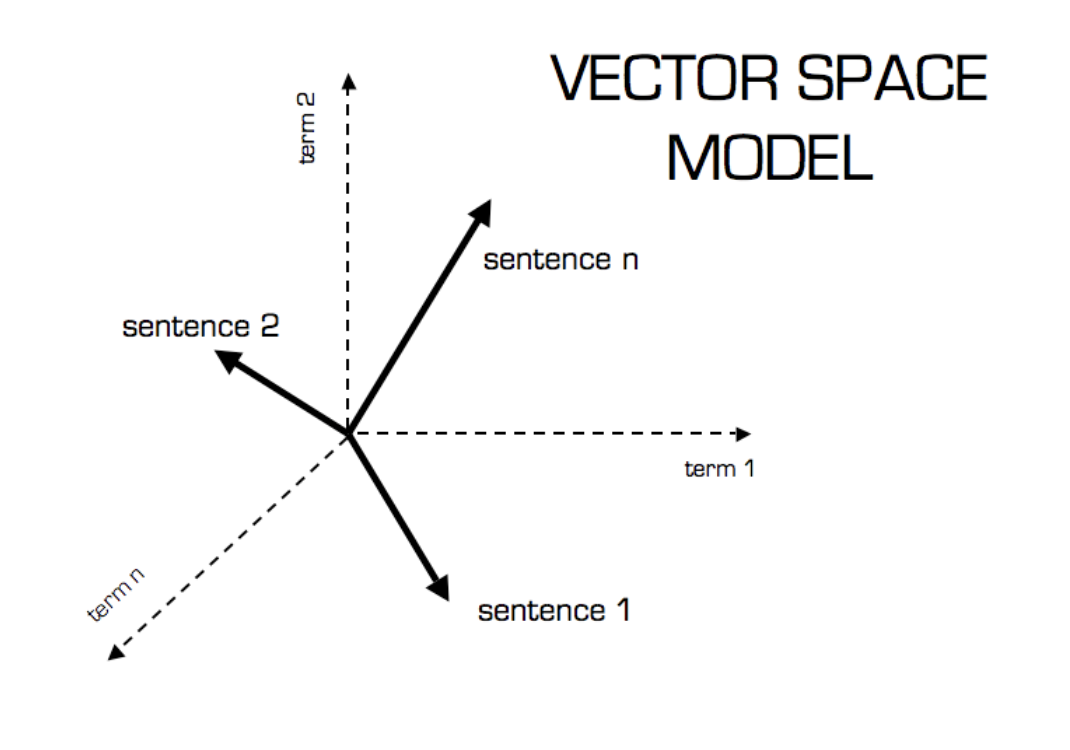


Our output for YOLOv3 and CNN after doing the cosine similarity will look something like this - 

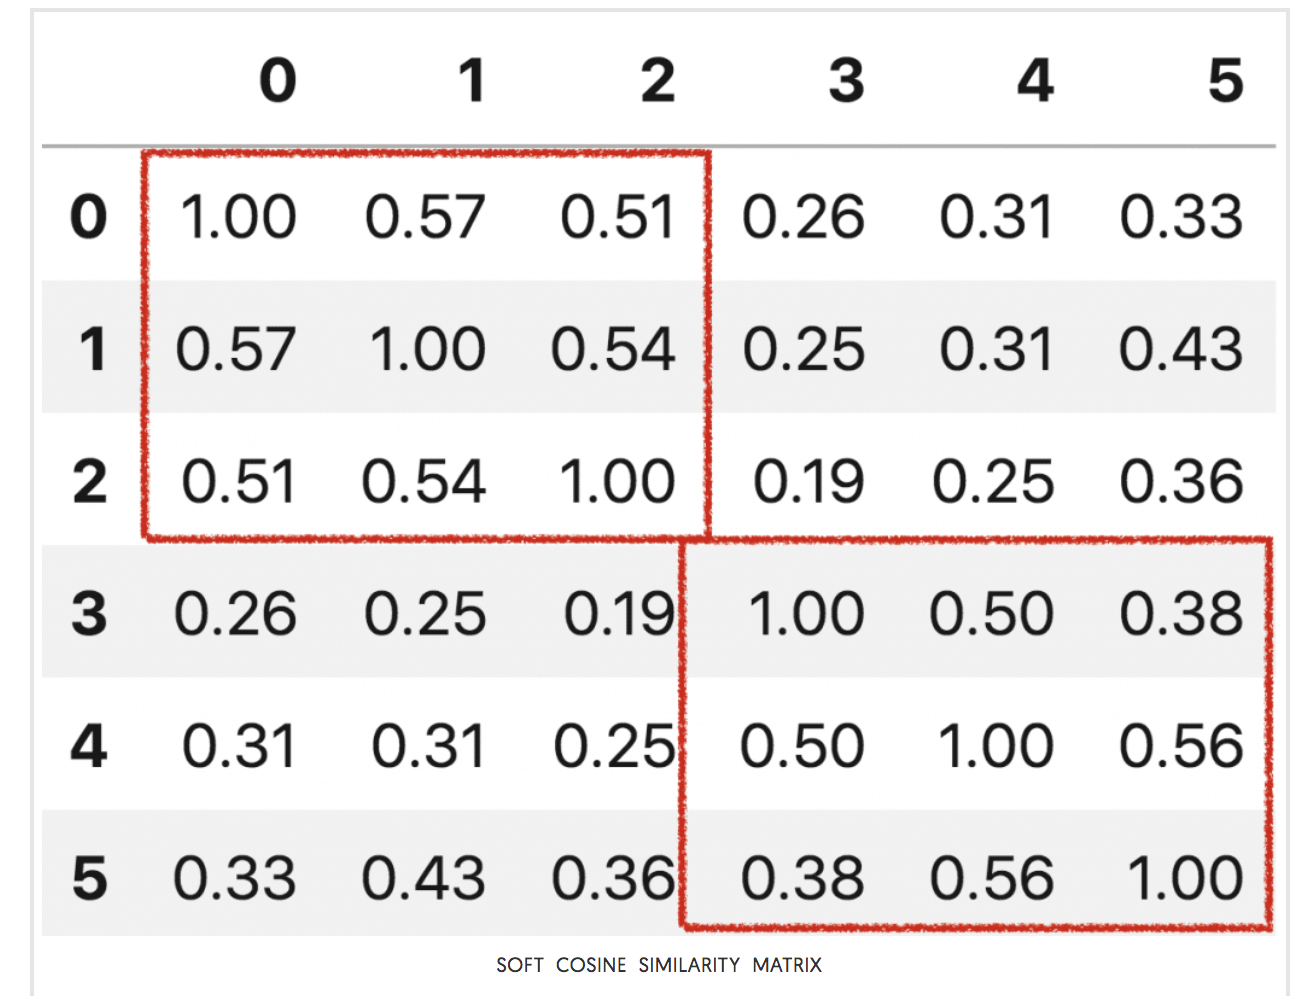


Triangular learning Rate - Generally when one sets their learning rate and trains the model, one would only wait for the learning rate to decrease over time and for the model to eventually converge. However, as the gradient reaches a plateau, the training loss becomes harder to improve. To overcome this problem, instead of using a fixed value for learning rate and decreasing it over time, if the training doesn’t improve our loss anymore, we’re going to be changing the learning rate every iteration according to some cyclic function f. Each cycle has a fixed length in terms of number of iterations. This method lets the learning rate cyclically vary between reasonable boundary values. It helps because, if we get stuck on saddle points, increasing the learning rate allows more rapid traversal of saddle point plateaus.

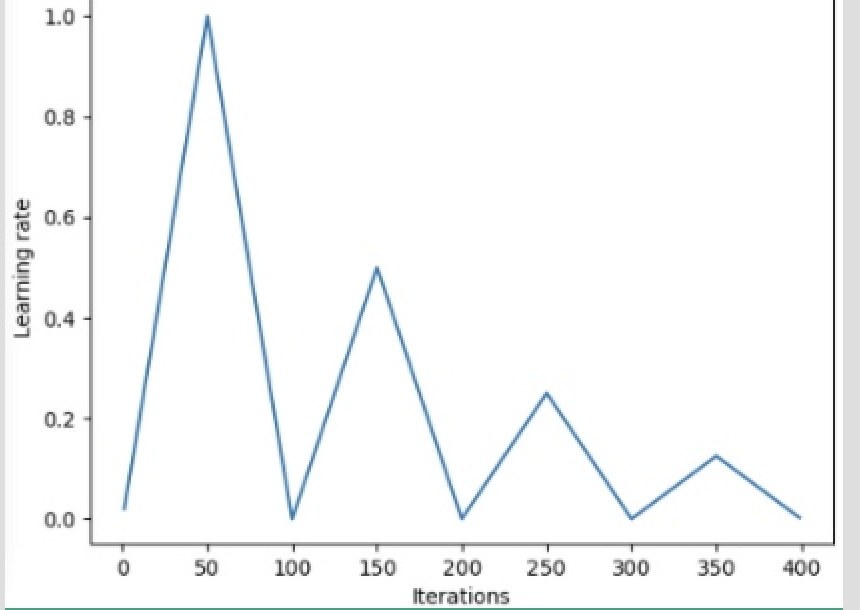




# Result 



For evaluation of the model, we created a new dataset that had 70 images

These images were not used for training 

We text annotated the images 

To evaluate the model, we passed this dataset of 70 images with 1 of the annotated text 

The correct gets score +1 if it correctly identifies the image associated with the label

Score for baseline model 					       37

Score for model with cosine similarity 		       42


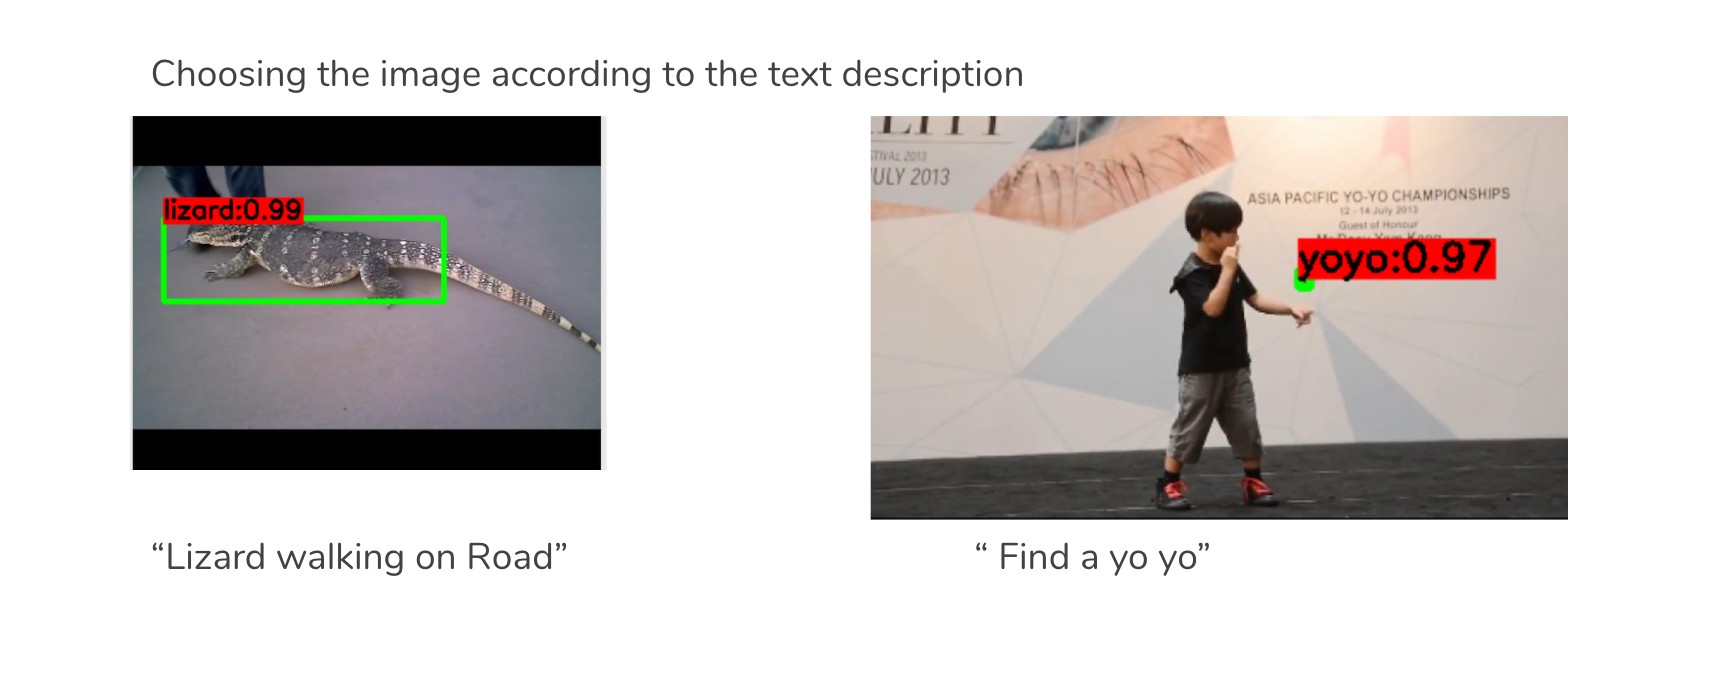